Testing

In [3]:
import networkx as nx
import osmnx as ox
import matplotlib
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm, gamma

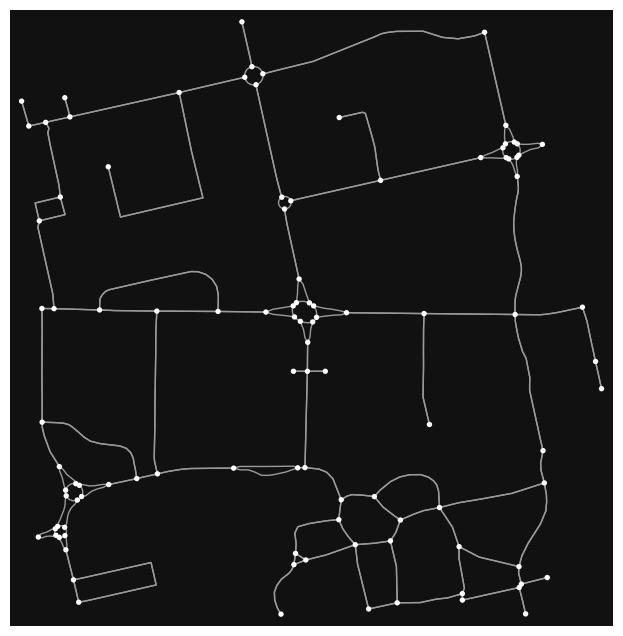

In [20]:
# Test Graph

testGraph = ox.graph.graph_from_point((38.539078, -121.752065), dist=250, network_type='bike')
fig, ax = ox.plot.plot_graph(testGraph)

# Save the graph for offline access
ox.io.save_graphml(testGraph, "testGraph.graphml")

In [6]:
# # Bike Network Graph

# location = ox.geocoder.geocode("Primero Grove Apartments")
# bikeGraph = ox.graph.graph_from_point(location, dist=500, network_type='bike')
# fig, ax = ox.plot.plot_graph(bikeGraph)

# # Save the graph for offline access
# ox.io.save_graphml(bikeGraph, "bikeGraph.graphml")

In [21]:
testGraph = ox.io.load_graphml("testGraph.graphml")

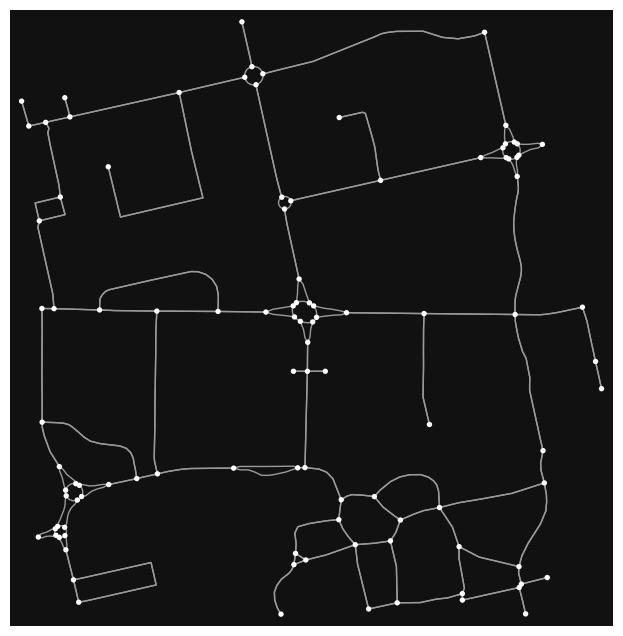

In [22]:
fig, ax = ox.plot.plot_graph(testGraph)

In [23]:
testGraph = ox.routing.add_edge_speeds(testGraph)
testGraph = ox.routing.add_edge_travel_times(testGraph)

In [24]:
ox.stats.basic_stats(testGraph)

{'n': 105,
 'm': 221,
 'k_avg': 4.20952380952381,
 'edge_length_total': 9107.774741276287,
 'edge_length_avg': 41.21165041301487,
 'streets_per_node_avg': 2.8857142857142857,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 2, 3: 92, 4: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.01904761904761905,
  3: 0.8761904761904762,
  4: 0.0380952380952381},
 'intersection_count': 98,
 'street_length_total': 4995.196359569827,
 'street_segment_count': 142,
 'street_length_avg': 35.17743915190019,
 'circuity_avg': 1.092330055625545,
 'self_loop_proportion': 0.0}

In [25]:
testGraph_gdf = ox.graph_to_gdfs(testGraph)

In [26]:
points = testGraph_gdf[0]
points

,y,x,street_count,geometry
osmid,,,,
95712770,38.539061,-121.750066,4,POINT (-121.75007 38.53906)
95716931,38.539897,-121.752174,3,POINT (-121.75217 38.5399)
95716932,38.540452,-121.750152,3,POINT (-121.75015 38.54045)
265024842,38.539079,-121.752408,3,POINT (-121.75241 38.53908)
271831022,38.540693,-121.753224,3,POINT (-121.75322 38.54069)
...,...,...,...,...
9156382464,38.540655,-121.754299,1,POINT (-121.7543 38.54066)
9159686623,38.540076,-121.750046,3,POINT (-121.75005 38.54008)
10684990777,38.538269,-121.754512,3,POINT (-121.75451 38.53827)


In [27]:
edges = testGraph_gdf[1]
edges

osmid   highway maxspeed  \
u           v           key                                              
95712770    277046658   0                  24411964  cycleway   15 mph   
            273245111   0                  24411964  cycleway   15 mph   
            273245096   0     [41889625, 991366978]  cycleway   15 mph   
            9159686623  0    [991366978, 391112883]  cycleway   15 mph   
95716931    559373141   0                  10746426  cycleway   15 mph   
...                                             ...       ...      ...   
10684990793 639324548   0                 218405222  cycleway      NaN   
            10684990777 0                1148407870  cycleway      NaN   
10684990794 10684990793 0                 218405222  cycleway      NaN   
            272014000   0                 218405222  cycleway      NaN   
            5674111324  0                1148407872   service   10 mph   

                                               name  oneway  reversed  \
u           v           key                                             
95712770    277046658   0           Hutchison Drive   False     False   
            273245111   0           Hutchison Drive   False      True   
            273245096   0                       NaN   False     False   
            9159686623  0                       NaN   False      True   
95716931    559373141   0    Peter J Shields Avenue   False     False   
...                                             ...     ...       ...   
10684990793 639324548   0                       NaN   False     False   
            10684990777 0                       NaN   False     False   
10684990794 10684990793 0                       NaN   False     False   
            272014000   0                       NaN   False      True   
            5674111324  0                       NaN   False     False   

                                 length  speed_kph  travel_time  \
u           v           key                                       
95712770    277046658   0     74.445826    24.1401    11.102066   
            273245111   0     55.648905    24.1401     8.298891   
            273245096   0    114.247851    24.1401    17.037720   
            9159686623  0    114.477385    24.1401    17.071950   
95716931    559373141   0     75.307218    24.1401    11.230525   
...                                 ...        ...          ...   
10684990793 639324548   0     23.446030    24.1401     3.496494   
            10684990777 0    101.269759    24.1401    15.102304   
10684990794 10684990793 0     17.320981    24.1401     2.583069   
            272014000   0     62.708203    24.1401     9.351640   
            5674111324  0    133.388708    16.0934    29.838278   

                                                                      geometry  \
u           v           key                                                      
95712770    277046658   0    LINESTRING (-121.75007 38.53906, -121.75092 38...   
            273245111   0    LINESTRING (-121.75007 38.53906, -121.74983 38...   
            273245096   0    LINESTRING (-121.75007 38.53906, -121.75006 38...   
            9159686623  0    LINESTRING (-121.75007 38.53906, -121.75007 38...   
95716931    559373141   0    LINESTRING (-121.75217 38.5399, -121.7521 38.5...   
...                                                                        ...   
10684990793 639324548   0    LINESTRING (-121.75362 38.53785, -121.75368 38...   
            10684990777 0    LINESTRING (-121.75362 38.53785, -121.75364 38...   
10684990794 10684990793 0    LINESTRING (-121.75343 38.53789, -121.75362 38...   
            272014000   0    LINESTRING (-121.75343 38.53789, -121.75333 38...   
            5674111324  0    LINESTRING (-121.75343 38.53789, -121.75345 38...   

                            junction lanes        service  
u           v           key                                
95712770    277046658   0        NaN   NaN            NaN  
            27

# Modify bike network

In [ ]:
# Set custom bike speed
bikeSpeed = 10  # in mph
edges["speed_kph"] = 1.609344 * bikeSpeed
edges["speed_kph"]

u            v            key
95712770     277046658    0      16.09344
             273245111    0      16.09344
             273245096    0      16.09344
             9159686623   0      16.09344
95716931     559373141    0      16.09344
                                   ...   
10684990793  639324548    0      16.09344
             10684990777  0      16.09344
10684990794  10684990793  0      16.09344
             272014000    0      16.09344
             5674111324   0      16.09344
Name: speed_kph, Length: 221, dtype: float64

In [ ]:
# Recalculate travel times based on new speed (seconds)
edges["travel_time"] = edges["length"] / (edges["speed_kph"] * 1000 / 3600)  # travel_time in seconds
edges["travel_time"]

u            v            key
95712770     277046658    0      16.653057
             273245111    0      12.448305
             273245096    0      25.556516
             9159686623   0      25.607862
95716931     559373141    0      16.845745
                                   ...    
10684990793  639324548    0       5.244727
             10684990777  0      22.653400
10684990794  10684990793  0       3.874593
             272014000    0      14.027425
             5674111324   0      29.838204
Name: travel_time, Length: 221, dtype: float64

## Generate time probability distribution functions

In [4]:
# Time range and interval creation
# For testing purposes, use 5 minutes and discretize into 0.1 second intervals
T = 300  # 5 minutes in seconds
timeUnit = 0.1  # 0.1 second intervals
intervals = int(T / timeUnit)
x = np.linspace(0, T, intervals + 1)

In [ ]:
# Normal distribution
norm

In [6]:
s = 5
lb, ub = lognorm.support(s)

In [ ]:
# Probability distribution of travel times
# normal, lognormal, logistic, gamma

# Clean driving network

# Varying Time Budgets